<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/interpolation_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function approximations: Linear interpolation and L2-projection

After this assignment, students are able to

*  Distinguish between the interpolation and L2-projection
*  Bring the methods into practice



In [0]:
# Original source:
# Introduction to finite element methods
# Hans Petter Langtangen
# Link: http://hplgit.github.io/INF5620/doc/pub/main_fem.pdf
# http://hplgit.github.io/INF5620/doc/pub/H14/fem/html/._main_fem-solarized003.html

def interpolation(f, psi, points):
    N = len(psi) - 1
    A = sp.zeros(N+1, N+1)
    b = sp.zeros(N+1, 1)
    x = sp.Symbol('x')
    # Turn psi and f into Python functions
    psi_vals = [sp.lambdify([x], psi[i]) for i in range(N+1)]
    f = sp.lambdify([x], f)
    for i in range(N+1):
        for j in range(N+1):
            A[i,j] = psi_vals[j](points[i])
        b[i,0] = f(points[i])
    c = A.LUsolve(b)
    u=0
    for i in range(len(psi)):
        u += c[i,0]*psi_vals[i](x)
    return u

def projection(f, psi, Omega):
    N = len(psi) - 1
    A = sp.zeros(N+1, N+1)
    b = sp.zeros(N+1, 1)
    x = sp.Symbol('x')
    for i in range(N+1):
        for j in range(i, N+1):
            A[i,j] = sp.integrate(psi[i]*psi[j],
                                  (x, Omega[0], Omega[1]))
            A[j,i] = A[i,j]
        b[i,0] = sp.integrate(psi[i]*f, (x, Omega[0], Omega[1]))
        c = A.LUsolve(b)
        u=0
    for i in range(len(psi)):
        u += c[i,0]*psi[i]
    return u

 

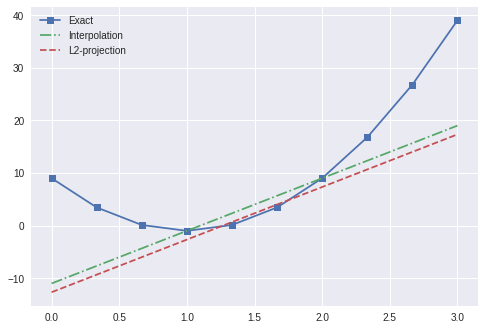

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


a, b = 1, 2

x = sp.Symbol('x')
f = 10*(x-1)**2-1
psi=[1, x]
points = [a, b]



up = projection(f, psi, Omega=[a, b])

ui = interpolation(f, psi, points)

lam_f = sp.lambdify(x, f, modules=['numpy'])
lam_ui = sp.lambdify(x, ui, modules=['numpy'])
lam_up = sp.lambdify(x, up, modules=['numpy'])


x_vals = np.linspace(0, 3, 10)
f_vals = lam_f(x_vals)
ui_vals = lam_ui(x_vals)
up_vals = lam_up(x_vals)

plt.figure(1)
plt.plot(x_vals, f_vals,'-',x_vals, ui_vals,'-.', x_vals, up_vals,'--')
plt.gca().legend(('Exact','Interpolation','L2-projection'))


Questions


1.   The L2 error of the approximation $u_h$ compared to the exact function $f$ is computed by 
$$||u_h-f||_{L_2}=\Biggl(\int_a^b (u_h-f)^2\,dx\Biggl)^{1/2}$$
Since we obtain analytical expressions of ui, up and f, it is completely possible to compute the L2 error using sp.integrate(). What is you conclusion about the accuarcy of ui and up in L2?
2.   Manipulate the basis functions psi and the interpolation points and given an example where the L2-error vanishes. Explain!

